In [1]:
#Load general libs
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

#import own libs
import test_algorithms as test

#Generate historic returns
data_directory=r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Data\stock_data_clean.csv'
data            = pd.read_csv(data_directory,header=[0, 1] , index_col = 0)
data.index      = pd.to_datetime(data.index)
data            = np.log(data)
symbols         = data.columns.unique(level=0)

returns = np.zeros((len(symbols),5249))
for i in range(len(symbols)):
    returns[i,:] = data[symbols[i]].Close - data[symbols[i]].Open

simple_returns = 100*(np.exp(returns)-1)

In [2]:
#Load estimated Q-values

#Market avg
bh_data = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\buyhold.csv')

#DQN1
loaded_arr = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\QL_CNN_05.csv')
QL_CNN = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // 2, 2)

#DQN2
QL_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\QL_LSTM.csv')
QL_LSTM = QL_LSTM_load.reshape(
    QL_LSTM_load.shape[0], QL_LSTM_load.shape[1] // 2, 2)

#DDQN1
DQL_CNN_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\DQL_CNN.csv')
DQL_CNN = DQL_CNN_load.reshape(
    DQL_CNN_load.shape[0], DQL_CNN_load.shape[1] // 2, 2)

#DDQN2
DQL_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\DQL_LSTM.csv')
DQL_LSTM = DQL_LSTM_load.reshape(
    DQL_LSTM_load.shape[0], DQL_LSTM_load.shape[1] // 2, 2)

#DDQN3
DQL_CNN_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\DQL_CNN_LSTM.csv')
DQL_CNN_LSTM = DQL_CNN_LSTM_load.reshape(
    DQL_CNN_LSTM_load.shape[0], DQL_CNN_LSTM_load.shape[1] // 2, 2)

#MIDQN 
MIDQL_CNN_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\MIDQL_CNN_LSTM.csv')
MIDQL_CNN_LSTM = MIDQL_CNN_LSTM_load.reshape(
    MIDQL_CNN_LSTM_load.shape[0], MIDQL_CNN_LSTM_load.shape[1] // 2, 2)

#MIDQN (1M)
MIDQL_CNN_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\MIDQL_CNN_LSTM_1M.csv')
MIDQL_CNN_LSTM_1M = MIDQL_CNN_LSTM_load.reshape(
    MIDQL_CNN_LSTM_load.shape[0], MIDQL_CNN_LSTM_load.shape[1] // 2, 2)

#MIDQN (500k)
MIDQL_CNN_LSTM_load = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Data\MIDQL_CNN_LSTM_500K.csv')
MIDQL_CNN_LSTM_500K = MIDQL_CNN_LSTM_load.reshape(
    MIDQL_CNN_LSTM_load.shape[0], MIDQL_CNN_LSTM_load.shape[1] // 2, 2)

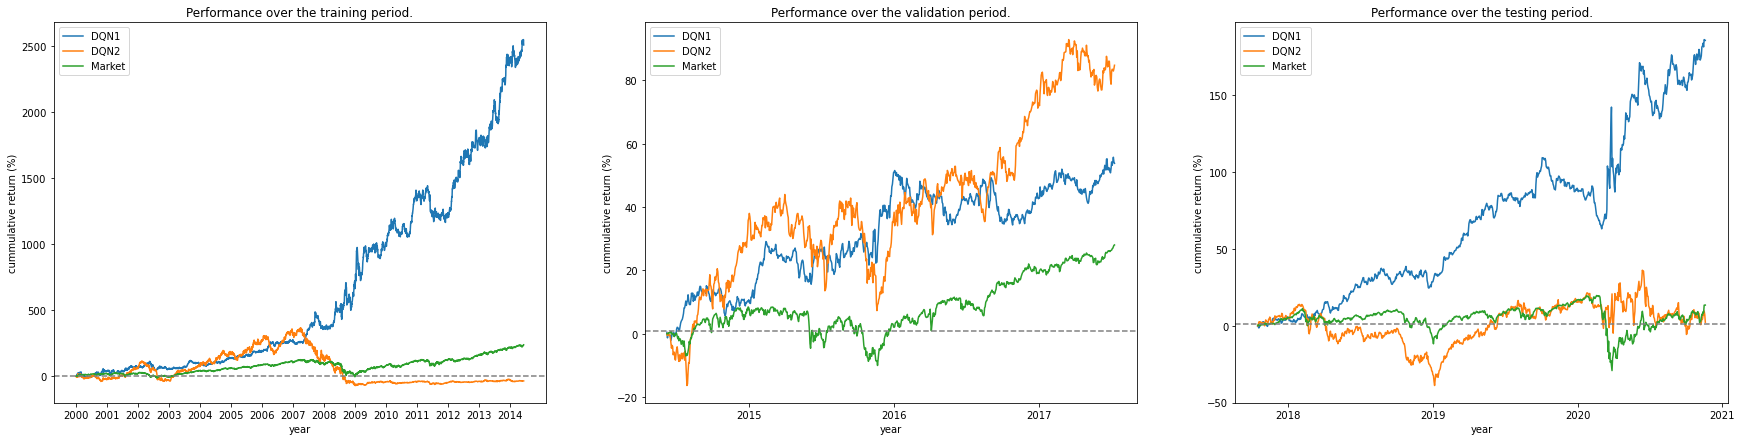

In [3]:
#Plot 1 

k=0.01

K = np.round(len(symbols)*k).astype(int)

#Difference
CNN_Top_K_indices    = (QL_CNN[:,:,0]-QL_CNN[:,:,1]).argsort(axis=1)[:,:K]
CNN_Bottom_K_indices = (QL_CNN[:,:,1]-QL_CNN[:,:,0]).argsort(axis=1)[:,:K]


LSTM_Top_K_indices    = (QL_LSTM[:,:,0]-QL_LSTM[:,:,1]).argsort(axis=1)[:,:K]
LSTM_Bottom_K_indices = (QL_LSTM[:,:,1]-QL_LSTM[:,:,0]).argsort(axis=1)[:,:K]

QL_CNN_returns = np.zeros((5217,1))
QL_LSTM_returns = np.zeros((5217,1))
for t in range(5217):
    QL_CNN_returns[t] = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]-returns[CNN_Bottom_K_indices[t],t+31:t+32])
    QL_LSTM_returns[t] = np.sum(returns[LSTM_Top_K_indices[t],t+31:t+32]+returns[LSTM_Bottom_K_indices[t],t+31:t+32])



fig,axs = plt.subplots(1,3,figsize=(30, 7))



#training 
t1=range(len(QL_CNN_returns))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(QL_CNN_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(QL_LSTM_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(bh_data[13:]/348)[:3651]))


t2=range(783)
axs[1].plot(t2,-100+100*np.exp(np.cumsum(QL_CNN_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(QL_LSTM_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(bh_data[13+3651:4434+13]/348)))



t3=range(783)

axs[2].plot(t3,-100+100*np.exp(np.cumsum(QL_CNN_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(QL_LSTM_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(bh_data[4434+13:]/348)))

period = ['training', 'validation', 'testing']
for i in range(3): 
    axs[i].axhline(1, color='grey', linestyle= '--')
    axs[i].legend(['DQN1', 'DQN2', 'Market'])
    plt.sca(axs[i])   
    plt.ylabel('cummulative return (%)')
    plt.xlabel('year')
    plt.title('Performance over the '+period[i]+' period.')

plt.sca(axs[0])   
plt.xticks([253*r  for r in range(15)], ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )
plt.sca(axs[1]) 
plt.xticks([ 253*(r+1)- 109  for r in range(3)], ['2015','2016','2017'] )
plt.sca(axs[2])  
plt.xticks([ 253*(r+1) -200  for r in range(4)], ['2018','2019','2020','2021'] )

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DQN1-DQN2-test-trend-05.pdf',  bbox_inches='tight', pad_inches=0)


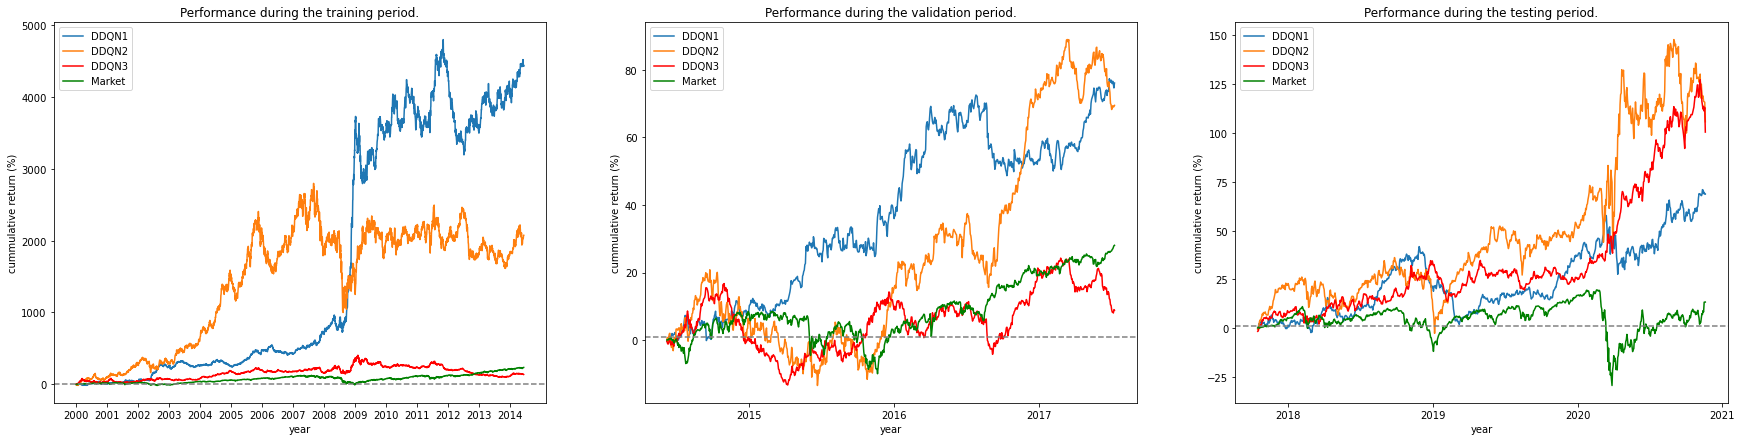

In [24]:
#Plot - DDQN

#Difference
CNN_Top_K_indices    = (DQL_CNN[:,:,0]-DQL_CNN[:,:,1]).argsort(axis=1)[:,:K]
CNN_Bottom_K_indices = (DQL_CNN[:,:,1]-DQL_CNN[:,:,0]).argsort(axis=1)[:,:K]


LSTM_Top_K_indices    = (DQL_LSTM[:,:,0]-DQL_LSTM[:,:,1]).argsort(axis=1)[:,:K]
LSTM_Bottom_K_indices = (DQL_LSTM[:,:,1]-DQL_LSTM[:,:,0]).argsort(axis=1)[:,:K]

CNN_LSTM_Top_K_indices    = (DQL_CNN_LSTM[:,:,0]-DQL_CNN_LSTM[:,:,1]).argsort(axis=1)[:,:K]
CNN_LSTM_Bottom_K_indices = (DQL_CNN_LSTM[:,:,1]-DQL_CNN_LSTM[:,:,0]).argsort(axis=1)[:,-K:]



DDQL_CNN_returns = np.zeros((5217,1))
DDQL_LSTM_returns = np.zeros((5217,1))
DDQL_CNN_LSTM_returns = np.zeros((5217,1))

for t in range(5217):
    DDQL_CNN_returns[t] = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]-returns[CNN_Bottom_K_indices[t],t+31:t+32])
    DDQL_LSTM_returns[t] = np.sum(returns[LSTM_Top_K_indices[t],t+31:t+32]+returns[LSTM_Bottom_K_indices[t],t+31:t+32])
    DDQL_CNN_LSTM_returns[t] = np.sum(returns[CNN_LSTM_Top_K_indices[t],t+31:t+32]-returns[CNN_LSTM_Bottom_K_indices[t],t+31:t+32])


fig,axs = plt.subplots(1,3,figsize=(30, 7))



#training 
t1=range(len(QL_CNN_returns))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(DDQL_CNN_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(DDQL_LSTM_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(DDQL_CNN_LSTM_returns/K)[:3651]), color='red')
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(bh_data[13:]/348)[:3651]) , color ='green')


t2=range(783)
axs[1].plot(t2,-100+100*np.exp(np.cumsum(DDQL_CNN_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(DDQL_LSTM_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(DDQL_CNN_LSTM_returns[3651:4434]/K)), color='red')
axs[1].plot(t2,-100+100*np.exp(np.cumsum(bh_data[13+3651:4434+13]/348)), color ='green')



t3=range(783)

axs[2].plot(t3,-100+100*np.exp(np.cumsum(DDQL_CNN_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(DDQL_LSTM_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(DDQL_CNN_LSTM_returns[4434:]/K)), color='red')
axs[2].plot(t3,-100+100*np.exp(np.cumsum(bh_data[4434+13:]/348)), color ='green')

period = ['training', 'validation', 'testing']
for i in range(3): 
    axs[i].axhline(1, color='grey', linestyle= '--')
    axs[i].legend(['DDQN1', 'DDQN2', 'DDQN3' ,'Market'])
    plt.sca(axs[i])   
    plt.ylabel('cummulative return (%)')
    plt.xlabel('year')
    plt.title('Performance during the '+period[i]+' period.')

plt.sca(axs[0])   
plt.xticks([253*r  for r in range(15)], ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )
plt.sca(axs[1]) 
plt.xticks([ 253*(r+1)- 109  for r in range(3)], ['2015','2016','2017'] )
plt.sca(axs[2])  
plt.xticks([ 253*(r+1) -200  for r in range(4)], ['2018','2019','2020','2021'] )

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DDQN1-DDQN2-DDQN3-test-trend-05.pdf',  bbox_inches='tight', pad_inches=0)


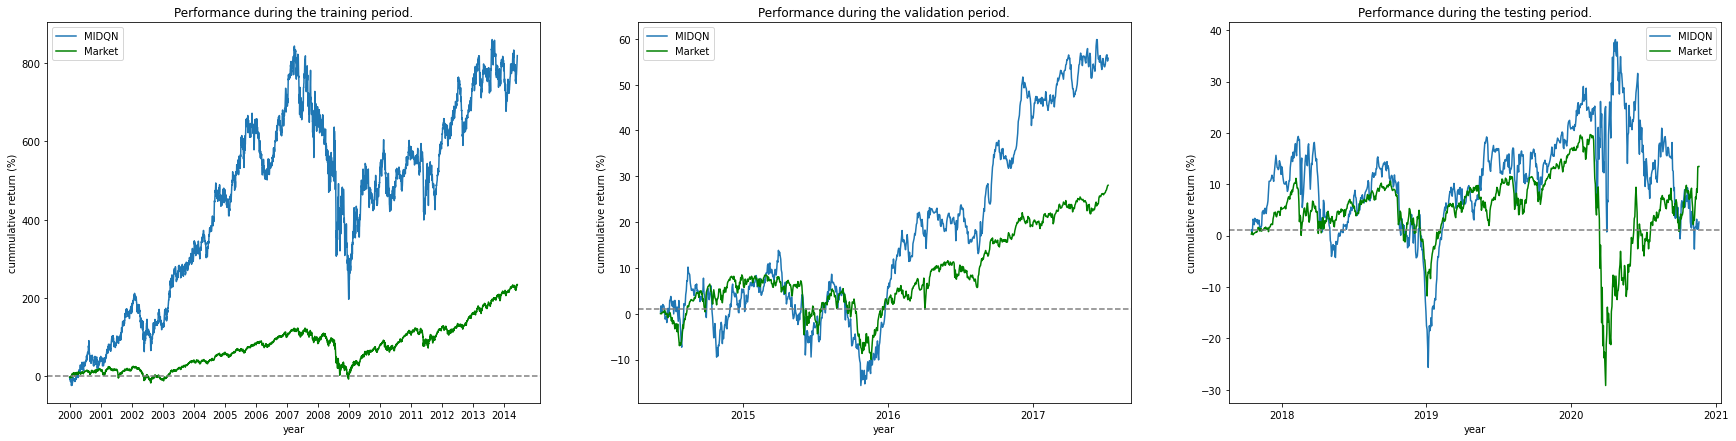

In [6]:
#Plot - MIDQN

#Difference

CNN_Top_K_indices    = (MIDQL_CNN_LSTM[:,:,0]-MIDQL_CNN_LSTM[:,:,1]).argsort(axis=1)[:,:K]
CNN_Bottom_K_indices = (MIDQL_CNN_LSTM[:,:,1]-MIDQL_CNN_LSTM[:,:,0]).argsort(axis=1)[:,-K:]


MIDQL_CNN_returns = np.zeros((5217,1))

for t in range(5217):
   MIDQL_CNN_returns[t] = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]+returns[CNN_Bottom_K_indices[t],t+31:t+32])

fig,axs = plt.subplots(1,3,figsize=(30, 7))



#training 
t1=range(len(MIDQL_CNN_returns))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(MIDQL_CNN_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(bh_data[13:]/348)[:3651]) , color ='green')


t2=range(783)
axs[1].plot(t2,-100+100*np.exp(np.cumsum(MIDQL_CNN_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(bh_data[13+3651:4434+13]/348)), color ='green')



t3=range(783)

axs[2].plot(t3,-100+100*np.exp(np.cumsum(MIDQL_CNN_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(bh_data[4434+13:]/348)), color ='green')

period = ['training', 'validation', 'testing']
for i in range(3): 
    axs[i].axhline(1, color='grey', linestyle= '--')
    axs[i].legend(['MIDQN', 'Market'])
    plt.sca(axs[i])   
    plt.ylabel('cummulative return (%)')
    plt.xlabel('year')
    plt.title('Performance during the '+period[i]+' period.')

plt.sca(axs[0])   
plt.xticks([253*r  for r in range(15)], ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )
plt.sca(axs[1]) 
plt.xticks([ 253*(r+1)- 109  for r in range(3)], ['2015','2016','2017'] )
plt.sca(axs[2])  
plt.xticks([ 253*(r+1) -200  for r in range(4)], ['2018','2019','2020','2021'] )

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN1-test-trend-05.pdf',  bbox_inches='tight', pad_inches=0)




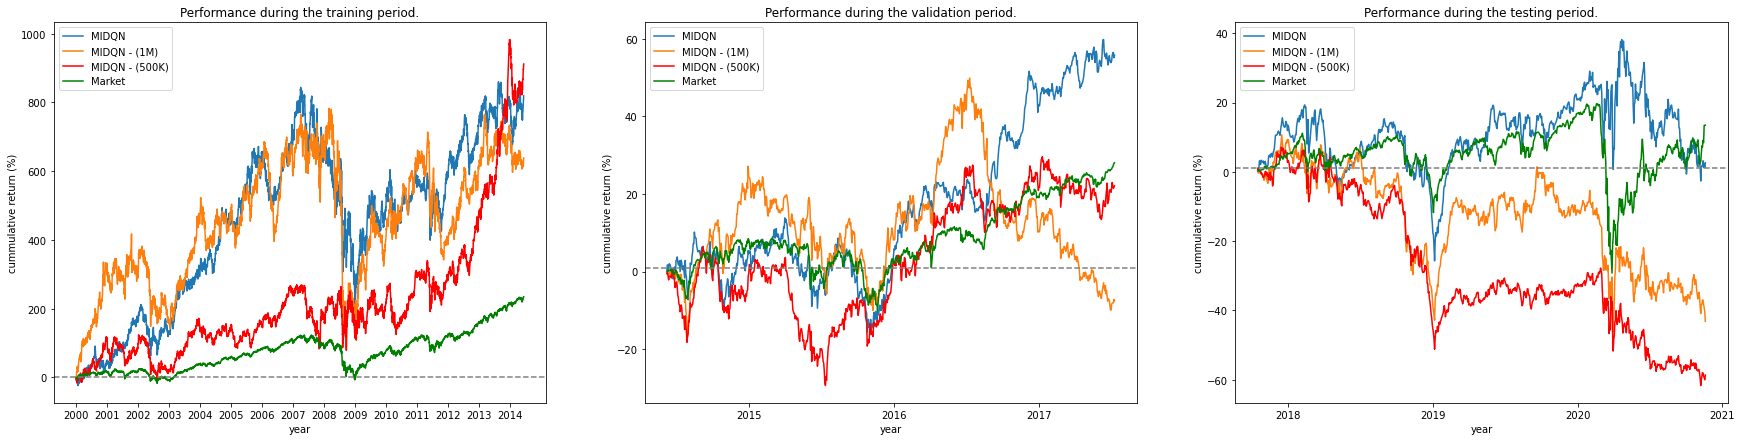

In [10]:
#Plot - MIDQN

#Difference

CNN_Top_K_indices    = (MIDQL_CNN_LSTM[:,:,0]-MIDQL_CNN_LSTM[:,:,1]).argsort(axis=1)[:,:K]
CNN_Bottom_K_indices = (MIDQL_CNN_LSTM[:,:,1]-MIDQL_CNN_LSTM[:,:,0]).argsort(axis=1)[:,-K:]

MIDQN1_Top_K_indices    = (MIDQL_CNN_LSTM_1M[:,:,0]-MIDQL_CNN_LSTM_1M[:,:,1]).argsort(axis=1)[:,:K]
MIDQN1_Bottom_K_indices = (MIDQL_CNN_LSTM_1M[:,:,1]-MIDQL_CNN_LSTM_1M[:,:,0]).argsort(axis=1)[:,-K:]

MIDQN2_Top_K_indices    = (MIDQL_CNN_LSTM_500K[:,:,0]-MIDQL_CNN_LSTM_500K[:,:,1]).argsort(axis=1)[:,:K]
MIDQN2_Bottom_K_indices = (MIDQL_CNN_LSTM_500K[:,:,1]-MIDQL_CNN_LSTM_500K[:,:,0]).argsort(axis=1)[:,-K:]


MIDQL_CNN_returns = np.zeros((5217,1))
MIDQL1_CNN_returns = np.zeros((5217,1))
MIDQL2_CNN_returns = np.zeros((5217,1))

for t in range(5217):
    MIDQL_CNN_returns[t] = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]+returns[CNN_Bottom_K_indices[t],t+31:t+32])
    MIDQL1_CNN_returns[t] = np.sum(returns[MIDQN1_Top_K_indices[t],t+31:t+32]+returns[MIDQN1_Bottom_K_indices[t],t+31:t+32])
    MIDQL2_CNN_returns[t] = np.sum(returns[MIDQN2_Top_K_indices[t],t+31:t+32]+returns[MIDQN2_Bottom_K_indices[t],t+31:t+32])

fig,axs = plt.subplots(1,3,figsize=(30, 7))



#training 
t1=range(len(MIDQL_CNN_returns))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(MIDQL_CNN_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(MIDQL1_CNN_returns/K)[:3651]))
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(MIDQL2_CNN_returns/K)[:3651]), color='red')
axs[0].plot(t1[:3651],-100+100*np.exp(np.cumsum(bh_data[13:]/348)[:3651]) , color ='green')


t2=range(783)
axs[1].plot(t2,-100+100*np.exp(np.cumsum(MIDQL_CNN_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(MIDQL1_CNN_returns[3651:4434]/K)))
axs[1].plot(t2,-100+100*np.exp(np.cumsum(MIDQL2_CNN_returns[3651:4434]/K)), color='red')
axs[1].plot(t2,-100+100*np.exp(np.cumsum(bh_data[13+3651:4434+13]/348)), color ='green')



t3=range(783)
axs[2].plot(t3,-100+100*np.exp(np.cumsum(MIDQL_CNN_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(MIDQL1_CNN_returns[4434:]/K)))
axs[2].plot(t3,-100+100*np.exp(np.cumsum(MIDQL2_CNN_returns[4434:]/K)), color='red')
axs[2].plot(t3,-100+100*np.exp(np.cumsum(bh_data[4434+13:]/348)), color ='green')

period = ['training', 'validation', 'testing']
for i in range(3): 
    axs[i].axhline(1, color='grey', linestyle= '--')
    axs[i].legend(['MIDQN','MIDQN - (1M)','MIDQN - (500K)','Market'])
    plt.sca(axs[i])   
    plt.ylabel('cummulative return (%)')
    plt.xlabel('year')
    plt.title('Performance during the '+period[i]+' period.')

plt.sca(axs[0])   
plt.xticks([253*r  for r in range(15)], ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )
plt.sca(axs[1]) 
plt.xticks([ 253*(r+1)- 109  for r in range(3)], ['2015','2016','2017'] )
plt.sca(axs[2])  
plt.xticks([ 253*(r+1) -200  for r in range(4)], ['2018','2019','2020','2021'] )

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN123-test-trend-05.pdf',  bbox_inches='tight', pad_inches=0)




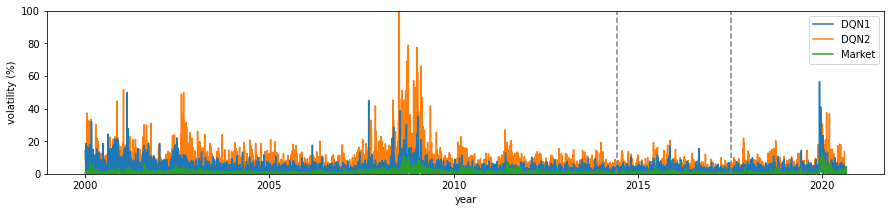

In [33]:
plt.figure(figsize=(15,3))
simple_R_DQN1= 100*(np.exp(QL_CNN_returns[:,0])-1)
simple_R_DQN2= 100*(np.exp(QL_LSTM_returns[:,0])-1)
simple_R_bh  = 100*(np.exp(bh_data/348)-1)

vol_DQN1 = ((simple_R_DQN1- np.mean(simple_R_DQN1))**2)**(1/2)
vol_DQN2 = ((simple_R_DQN2- np.mean(simple_R_DQN2))**2)**(1/2)
vol_bh   = ((simple_R_bh- np.mean(simple_R_bh))**2)**(1/2)



plt.plot(vol_DQN1, color='#1f77b4', zorder=1)
plt.plot(vol_DQN2, color='#ff7f0e', zorder=0)
plt.plot(vol_bh, color='#2ca02c', zorder=2)

xposition = [3651, 4434]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--')

plt.legend(['DQN1','DQN2', 'Market'])
plt.xticks([5*253*r  for r in range(5)], ['2000','2005','2010','2015', '2020'] )
plt.ylabel('volatility (%)')
plt.xlabel('year')

plt.ylim(0,100)

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DQN12_vol.pdf',  bbox_inches='tight', pad_inches=0)

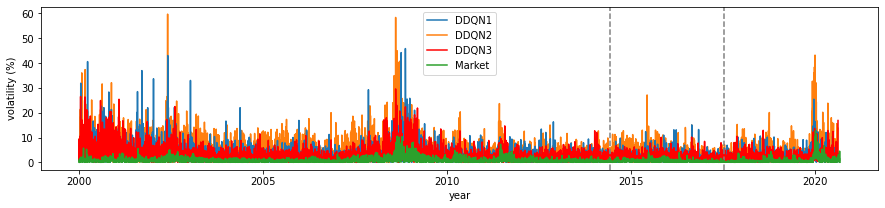

In [30]:
plt.figure(figsize=(15,3))
simple_R_DDQN1= 100*(np.exp(DDQL_CNN_returns[:,0])-1)
simple_R_DDQN2= 100*(np.exp(DDQL_LSTM_returns[:,0])-1)
simple_R_DDQN3= 100*(np.exp(DDQL_CNN_LSTM_returns[:,0])-1)
simple_R_bh  = 100*(np.exp(bh_data/348)-1)

vol_DDQN1 = ((simple_R_DDQN1 - np.mean(simple_R_DDQN1))**2)**(1/2)
vol_DDQN2 = ((simple_R_DDQN2 - np.mean(simple_R_DDQN2))**2)**(1/2)
vol_DDQN3 = ((simple_R_DDQN3 - np.mean(simple_R_DDQN3))**2)**(1/2)
vol_bh    = ((simple_R_bh    - np.mean(simple_R_bh   ))**2)**(1/2)



plt.plot(vol_DDQN1, color='#1f77b4', zorder=1)
plt.plot(vol_DDQN2, color='#ff7f0e', zorder=0)
plt.plot(vol_DDQN3, color='red', zorder=2)
plt.plot(vol_bh, color='#2ca02c', zorder=3)

xposition = [3651, 4434]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--')

plt.legend(['DDQN1','DDQN2', 'DDQN3', 'Market'])
plt.xticks([5*253*r  for r in range(5)], ['2000','2005','2010','2015', '2020'] )
plt.ylabel('volatility (%)')
plt.xlabel('year')


plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DDQN123_vol.pdf',  bbox_inches='tight', pad_inches=0)

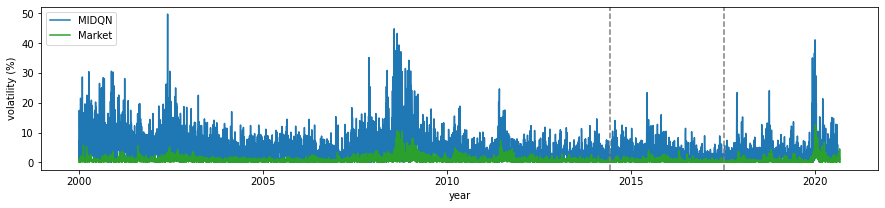

In [28]:

plt.figure(figsize=(15,3))
simple_R_MIDQN= 100*(np.exp(MIDQL_CNN_returns[:,0])-1)
simple_R_bh  = 100*(np.exp(bh_data/348)-1)

vol_MIDQN = ((simple_R_MIDQN- np.mean(simple_R_MIDQN))**2)**(1/2)
vol_bh   = ((simple_R_bh- np.mean(simple_R_bh))**2)**(1/2)



plt.plot(vol_MIDQN, color='#1f77b4', zorder=1)
plt.plot(vol_bh, color='#2ca02c', zorder=2)

xposition = [3651, 4434]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--')

plt.legend(['MIDQN','Market'])
plt.xticks([5*253*r  for r in range(5)], ['2000','2005','2010','2015', '2020'] )
plt.ylabel('volatility (%)')
plt.xlabel('year')



plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN_vol.pdf',  bbox_inches='tight', pad_inches=0)

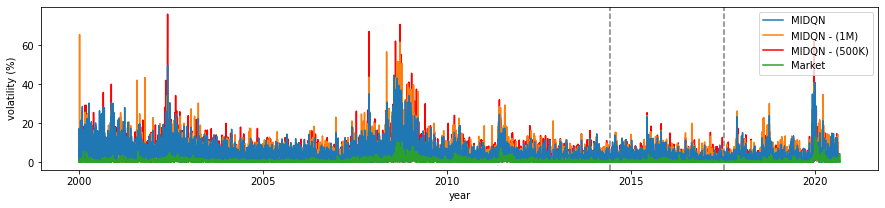

In [29]:

plt.figure(figsize=(15,3))
simple_R_MIDQN= 100*(np.exp(MIDQL_CNN_returns[:,0])-1)
simple_R_MIDQN1= 100*(np.exp(MIDQL1_CNN_returns[:,0])-1)
simple_R_MIDQN2=100*(np.exp(MIDQL2_CNN_returns[:,0])-1)
simple_R_bh  = 100*(np.exp(bh_data/348)-1)


vol_MIDQN = ((simple_R_MIDQN- np.mean(simple_R_MIDQN))**2)**(1/2)
vol_MIDQN1 = ((simple_R_MIDQN1- np.mean(simple_R_MIDQN1))**2)**(1/2)
vol_MIDQN2 = ((simple_R_MIDQN2- np.mean(simple_R_MIDQN2))**2)**(1/2)
vol_bh   = ((simple_R_bh- np.mean(simple_R_bh))**2)**(1/2)



plt.plot(vol_MIDQN, color='#1f77b4', zorder=3)
plt.plot(vol_MIDQN1, color='#ff7f0e', zorder=2)
plt.plot(vol_MIDQN2, color='red', zorder=0)
plt.plot(vol_bh, color='#2ca02c', zorder=5)

xposition = [3651, 4434]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--')

plt.legend(['MIDQN','MIDQN - (1M)','MIDQN - (500K)','Market'])
plt.xticks([5*253*r  for r in range(5)], ['2000','2005','2010','2015', '2020'] )
plt.ylabel('volatility (%)')
plt.xlabel('year')



plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN123_vol.pdf',  bbox_inches='tight', pad_inches=0)

In [16]:


k = [0.01, 0.02, 0.05, 0.1, 0.15,0.20]
T = [0,3651, 4434, 5216]

QL_CNN_returns = np.zeros((5217,len(k)))
QL_LSTM_returns = np.zeros((5217,len(k)))

QL_CNN_ann_returns=np.zeros((4,len(k)+1))
QL_LSTM_ann_returns=np.zeros((4,len(k)+1))

for i in range(len(k)):
    K = np.round(len(symbols)*k[i]).astype(int)

    CNN_Top_K_indices    = (QL_CNN[:,:,0]-QL_CNN[:,:,1]).argsort(axis=1)[:,:K]
    CNN_Bottom_K_indices = (QL_CNN[:,:,1]-QL_CNN[:,:,0]).argsort(axis=1)[:,:K]


    LSTM_Top_K_indices    = (QL_LSTM[:,:,0]-QL_LSTM[:,:,1]).argsort(axis=1)[:,:K]
    LSTM_Bottom_K_indices = (QL_LSTM[:,:,1]-QL_LSTM[:,:,0]).argsort(axis=1)[:,:K]

    for t in range(5217):
        QL_CNN_returns[t,i] = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]-returns[CNN_Bottom_K_indices[t],t+31:t+32])/K
        QL_LSTM_returns[t,i] = np.sum(returns[LSTM_Top_K_indices[t],t+31:t+32]-returns[LSTM_Bottom_K_indices[t],t+31:t+32])/K

for j in range(len(T)-1):
     QL_CNN_ann_returns[j,:-1]=(np.exp(np.mean(QL_CNN_returns[T[j]:T[j+1]], axis=0)))**(252)-1
     QL_LSTM_ann_returns[j,:-1]=(np.exp(np.mean(QL_LSTM_returns[T[j]:T[j+1]], axis=0)))**(252)-1

     QL_CNN_ann_returns[j,-1]= (np.exp(np.mean(bh_data[T[j]:T[j+1]]/348, axis=0)))**(252)-1
     QL_LSTM_ann_returns[j,-1]= (np.exp(np.mean(bh_data[T[j]:T[j+1]]/348, axis=0)))**(252)-1



QL_CNN_ann_returns[-1,:-1]        = (np.exp(np.mean(QL_CNN_returns[:], axis=0)))**(252)-1
QL_LSTM_ann_returns[-1,:-1]       = (np.exp(np.mean(QL_LSTM_returns[:], axis=0)))**(252)-1

QL_CNN_ann_returns[-1,-1]         = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1
QL_LSTM_ann_returns[-1,-1]        = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1



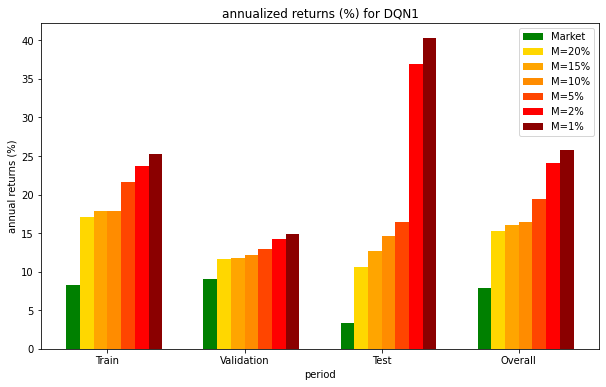

In [458]:

width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(QL_CNN_ann_returns[:,6-i]))+ width*i, 100*QL_CNN_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )
plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for DQN1')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for DQN1.pdf')

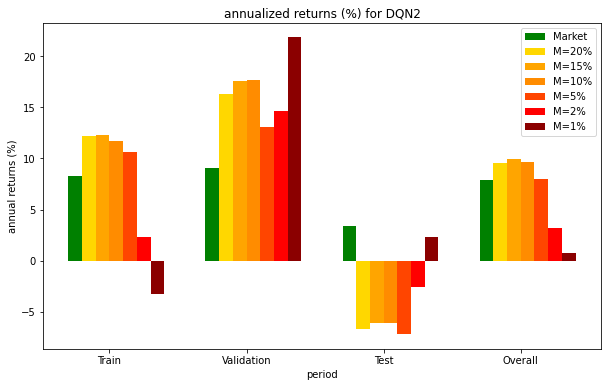

In [459]:

width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(QL_LSTM_ann_returns[:,6-i]))+ width*i, 100*QL_LSTM_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for DQN2')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for DQN2.pdf')

In [17]:
k = [0.01, 0.02, 0.05, 0.1, 0.15,0.20]
T = [0,3651, 4434, 5217]

DDQL_CNN_returns      = np.zeros((5217,len(k)))
DDQL_LSTM_returns     = np.zeros((5217,len(k)))
DDQL_CNN_LSTM_returns = np.zeros((5217,len(k)))

DDQL_CNN_ann_returns      = np.zeros((4,len(k)+1))
DDQL_LSTM_ann_returns     = np.zeros((4,len(k)+1))
DDQL_CNN_LSTM_ann_returns = np.zeros((4,len(k)+1))

for i in range(len(k)):
    K = np.round(len(symbols)*k[i]).astype(int)

    CNN_Top_K_indices    = (DQL_CNN[:,:,0]-DQL_CNN[:,:,1]).argsort(axis=1)[:,:K]
    CNN_Bottom_K_indices = (DQL_CNN[:,:,1]-DQL_CNN[:,:,0]).argsort(axis=1)[:,:K]


    LSTM_Top_K_indices    = (DQL_LSTM[:,:,0]-DQL_LSTM[:,:,1]).argsort(axis=1)[:,:K]
    LSTM_Bottom_K_indices = (DQL_LSTM[:,:,1]-DQL_LSTM[:,:,0]).argsort(axis=1)[:,:K]
    
    CNN_LSTM_Top_K_indices    = (DQL_CNN_LSTM[:,:,0]-DQL_CNN_LSTM[:,:,1]).argsort(axis=1)[:,:K]
    CNN_LSTM_Bottom_K_indices = (DQL_CNN_LSTM[:,:,1]-DQL_CNN_LSTM[:,:,0]).argsort(axis=1)[:,-K:]

    for t in range(5217):
        DDQL_CNN_returns[t,i]       = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]-returns[CNN_Bottom_K_indices[t],t+31:t+32])/K
        DDQL_LSTM_returns[t,i]      = np.sum(returns[LSTM_Top_K_indices[t],t+31:t+32]+returns[LSTM_Bottom_K_indices[t],t+31:t+32])/K
        DDQL_CNN_LSTM_returns[t,i]  = np.sum(returns[CNN_LSTM_Top_K_indices[t],t+31:t+32]-returns[CNN_LSTM_Bottom_K_indices[t],t+31:t+32])/K

for j in range(len(T)-1):
     DDQL_CNN_ann_returns[j,:-1]        = (np.exp(np.mean(DDQL_CNN_returns[T[j]:T[j+1]]     , axis=0)))**   (252)-1
     DDQL_LSTM_ann_returns[j,:-1]       = (np.exp(np.mean(DDQL_LSTM_returns[T[j]:T[j+1]]    , axis=0)))**   (252)-1
     DDQL_CNN_LSTM_ann_returns[j,:-1]   = (np.exp(np.mean(DDQL_CNN_LSTM_returns[T[j]:T[j+1]], axis=0)))**   (252)-1

     DDQL_CNN_ann_returns[j,-1]        = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1
     DDQL_LSTM_ann_returns[j,-1]       = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1
     DDQL_CNN_LSTM_ann_returns[j,-1]   = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1

DDQL_CNN_ann_returns[-1,:-1]        = (np.exp(np.mean(DDQL_CNN_returns[:]       , axis=0)))**(252)-1
DDQL_LSTM_ann_returns[-1,:-1]       = (np.exp(np.mean(DDQL_LSTM_returns[:]      , axis=0)))**(252)-1
DDQL_CNN_LSTM_ann_returns[-1,:-1]   = (np.exp(np.mean(DDQL_CNN_LSTM_returns[:]  , axis=0)))**(252)-1

DDQL_CNN_ann_returns[-1,-1]         = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1
DDQL_LSTM_ann_returns[-1,-1]        = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1
DDQL_CNN_LSTM_ann_returns[-1,-1]    = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1

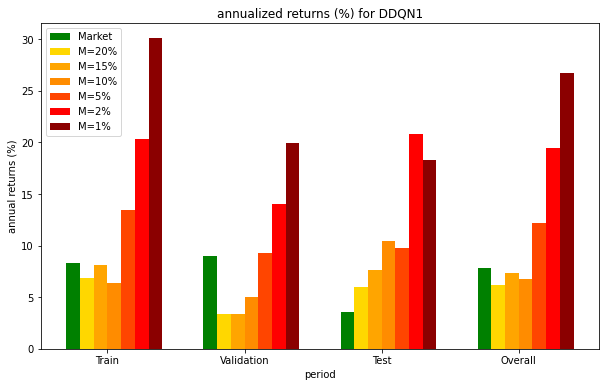

In [461]:
width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_CNN_ann_returns[:,6-i]))+ width*i, 100*DDQL_CNN_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for DDQN1')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for DDQN1.pdf')

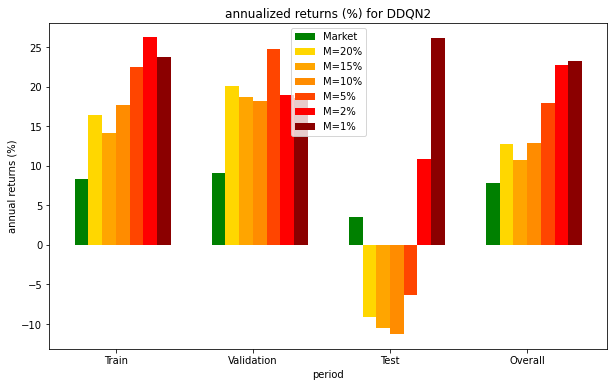

In [463]:
width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_LSTM_ann_returns[:,6-i]))+ width*i, 100*DDQL_LSTM_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for DDQN2')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for DDQN2.pdf')

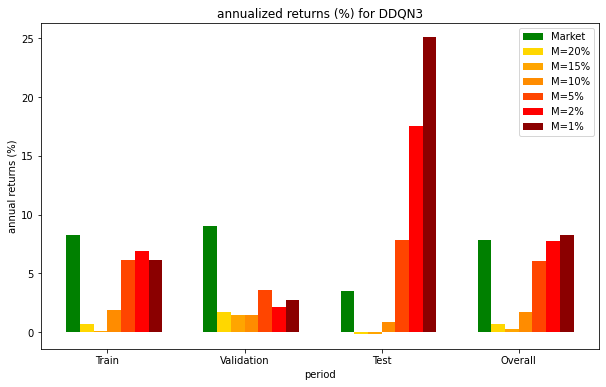

In [465]:
width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_CNN_LSTM_ann_returns[:,6-i]))+ width*i, 100*DDQL_CNN_LSTM_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for DDQN3')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for DDQN3.pdf')

In [18]:
k = [0.01, 0.02, 0.05, 0.1, 0.15,0.20]
T = [0,3651, 4434, 5217]

MIDQL_CNN_returns      = np.zeros((5217,len(k)))
MIDDQL_LSTM_returns     = np.zeros((5217,len(k)))
MIDDQL_CNN_LSTM_returns = np.zeros((5217,len(k)))

DDQL_CNN_ann_returns      = np.zeros((4,len(k)+1))
DDQL_LSTM_ann_returns     = np.zeros((4,len(k)+1))
DDQL_CNN_LSTM_ann_returns = np.zeros((4,len(k)+1))

for i in range(len(k)):
    K = np.round(len(symbols)*k[i]).astype(int)

    CNN_Top_K_indices    = (MIDQL_CNN_LSTM[:,:,0]-MIDQL_CNN_LSTM[:,:,1]).argsort(axis=1)[:,:K]
    CNN_Bottom_K_indices = (MIDQL_CNN_LSTM[:,:,1]-MIDQL_CNN_LSTM[:,:,0]).argsort(axis=1)[:,-K:]


    LSTM_Top_K_indices    = (MIDQL_CNN_LSTM_1M[:,:,0]-MIDQL_CNN_LSTM_1M[:,:,1]).argsort(axis=1)[:,:K]
    LSTM_Bottom_K_indices = (MIDQL_CNN_LSTM_1M[:,:,1]-MIDQL_CNN_LSTM_1M[:,:,0]).argsort(axis=1)[:,-K:]
    
    CNN_LSTM_Top_K_indices    = (MIDQL_CNN_LSTM_500K[:,:,0]-MIDQL_CNN_LSTM_500K[:,:,1]).argsort(axis=1)[:,:K]
    CNN_LSTM_Bottom_K_indices = (MIDQL_CNN_LSTM_500K[:,:,1]-MIDQL_CNN_LSTM_500K[:,:,0]).argsort(axis=1)[:,-K:]

    for t in range(5217):
        MIDQL_CNN_returns[t,i]        = np.sum(returns[CNN_Top_K_indices[t],t+31:t+32]+returns[CNN_Bottom_K_indices[t],t+31:t+32])/K
        MIDDQL_LSTM_returns[t,i]      = np.sum(returns[LSTM_Top_K_indices[t],t+31:t+32]+returns[LSTM_Bottom_K_indices[t],t+31:t+32])/K
        MIDDQL_CNN_LSTM_returns[t,i]  = np.sum(returns[CNN_LSTM_Top_K_indices[t],t+31:t+32]+returns[CNN_LSTM_Bottom_K_indices[t],t+31:t+32])/K

for j in range(len(T)-1):
     DDQL_CNN_ann_returns[j,:-1]        = (np.exp(np.mean(MIDQL_CNN_returns[T[j]:T[j+1]]      ,axis=0)))**(252)-1
     DDQL_LSTM_ann_returns[j,:-1]       = (np.exp(np.mean(MIDDQL_LSTM_returns[T[j]:T[j+1]]    ,axis=0)))**(252)-1
     DDQL_CNN_LSTM_ann_returns[j,:-1]   = (np.exp(np.mean(MIDDQL_CNN_LSTM_returns[T[j]:T[j+1]],axis=0)))**(252)-1

     DDQL_CNN_ann_returns[j,-1]        = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1
     DDQL_LSTM_ann_returns[j,-1]       = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1
     DDQL_CNN_LSTM_ann_returns[j,-1]   = (np.exp(np.mean(bh_data[T[j]:T[j+1]], axis=0)/348))**(252)-1

DDQL_CNN_ann_returns[-1,:-1]        = (np.exp(np.mean(MIDQL_CNN_returns[:]        , axis=0)))**(252)-1
DDQL_LSTM_ann_returns[-1,:-1]       = (np.exp(np.mean(MIDDQL_LSTM_returns[:]      , axis=0)))**(252)-1
DDQL_CNN_LSTM_ann_returns[-1,:-1]   = (np.exp(np.mean(MIDDQL_CNN_LSTM_returns[:]  , axis=0)))**(252)-1

DDQL_CNN_ann_returns[-1,-1]         = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1
DDQL_LSTM_ann_returns[-1,-1]        = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1
DDQL_CNN_LSTM_ann_returns[-1,-1]    = (np.exp(np.mean(bh_data[:], axis=0)/348))**(252)-1

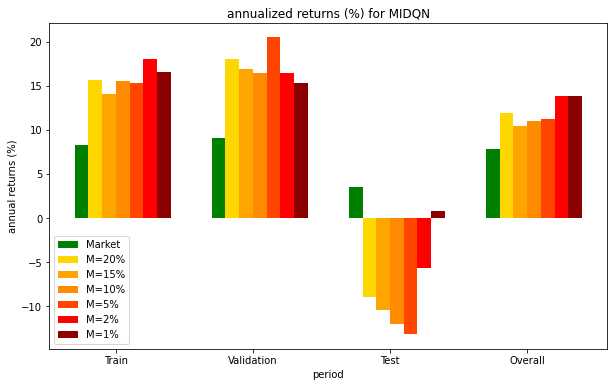

In [469]:
width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_CNN_ann_returns[:,6-i]))+ width*i, 100*DDQL_CNN_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for MIDQN')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for MIDQN.pdf')

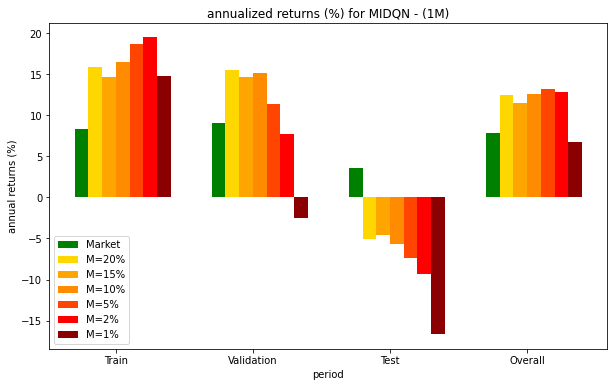

In [471]:
width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_LSTM_ann_returns[:,6-i]))+ width*i, 100*DDQL_LSTM_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for MIDQN - (1M)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for MIDQN 1M.pdf')

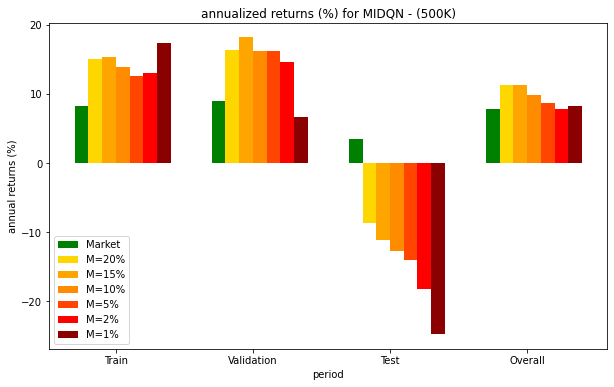

In [472]:

width =0.1
plt.figure(figsize=(10,6))
cols = ['green','gold','orange' ,'darkorange','orangered', 'red', 'darkred']
for i in range(7):
    plt.bar(np.arange(len(DDQL_CNN_LSTM_ann_returns[:,6-i]))+ width*i, 100*DDQL_CNN_LSTM_ann_returns[:,6-i], width=width, color = cols[i])

plt.legend(['Market','M=20%','M=15%','M=10%','M=5%','M=2%','M=1%'])
plt.xticks([r + 2.5*width for r in range(4)], ['Train','Validation','Test', 'Overall'] )

plt.ylabel('annual returns (%)')
plt.xlabel('period')
plt.title('annualized returns (%) for MIDQN - (500K)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\Annualized returns for MIDQN 500k.pdf')

In [254]:
#training rewards

r_DL_CNN = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\QL - CNN\reward.csv')
r_DL_LSTM = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\QL - LSTM\reward.csv')
r_DDQL_CNN = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\DQL - CNN\reward.csv')
r_DDQL_LSTM = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\DQL - LSTM\reward.csv')
r_DDQL_CNN_LSTM = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\DQL - CNN LSTM\reward.csv')
r_MIDQN_LSTM = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\MIDQN - CNN LSTM\reward.csv')

r_MIDQN_LSTM_1M = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\MIDQN - CNN LSTM - 1M\reward.csv')
r_MIDQN_LSTM_500K = np.loadtxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\binary\MIDQN - CNN LSTM - 500K\reward.csv')

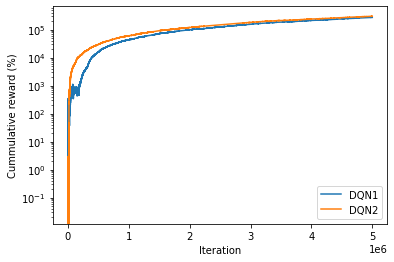

In [255]:

plt.plot(np.cumsum(r_DL_CNN))
plt.plot(np.cumsum(r_DL_LSTM))

plt.legend(['DQN1','DQN2'])
plt.ylabel('Cummulative reward (%)')
plt.xlabel('Iteration')
plt.yscale('log')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DQN1-DQN2- cum reward.pdf')

In [256]:
avg_r_DL_CNN = np.cumsum(r_DL_CNN)/(np.arange(len(r_DL_CNN))+1)
avg_r_DL_LSTM = np.cumsum(r_DL_LSTM)/(np.arange(len(r_DL_LSTM))+1)

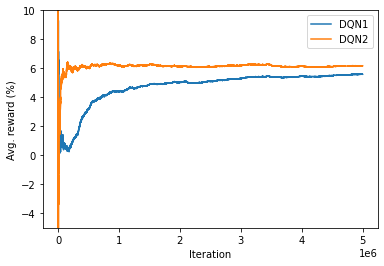

In [257]:

plt.plot(100*(np.exp(avg_r_DL_CNN)-1))
plt.plot(100*(np.exp(avg_r_DL_LSTM)-1))
plt.ylim((-5,10))

plt.legend(['DQN1','DQN2'])
plt.ylabel('Avg. reward (%)')
plt.xlabel('Iteration')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DQN1-DQN2-avg reward.pdf')

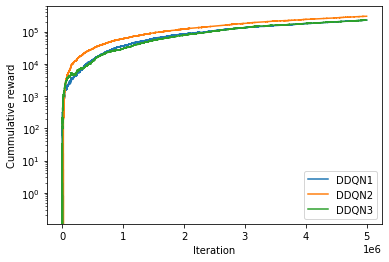

In [258]:
plt.plot(np.cumsum(r_DDQL_CNN))
plt.plot(np.cumsum(r_DDQL_LSTM))
plt.plot(np.cumsum(r_DDQL_CNN_LSTM))

plt.legend(['DDQN1','DDQN2','DDQN3'])
plt.ylabel('Cummulative reward')
plt.xlabel('Iteration')
plt.yscale('log')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DDQN1-DDQN2-DDQN3 - cum reward.png')

In [259]:
avg_r_DDQL_CNN = np.cumsum(r_DDQL_CNN)/(np.arange(len(r_DDQL_CNN))+1)
avg_r_DDQL_LSTM = np.cumsum(r_DDQL_LSTM)/(np.arange(len(r_DDQL_LSTM))+1)
avg_r_DDQL_CNN_LSTM = np.cumsum(r_DDQL_CNN_LSTM)/(np.arange(len(r_DDQL_CNN_LSTM))+1)

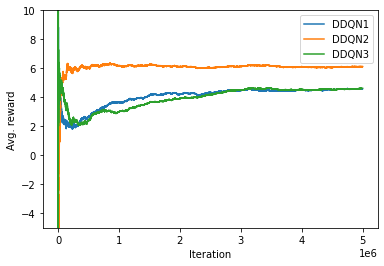

In [260]:

plt.plot(100*(np.exp(avg_r_DDQL_CNN)-1))
plt.plot(100*(np.exp(avg_r_DDQL_LSTM)-1))
plt.plot(100*(np.exp(avg_r_DDQL_CNN_LSTM)-1))
plt.ylim((-5,10))

plt.legend(['DDQN1','DDQN2', 'DDQN3'])
plt.ylabel('Avg. reward')
plt.xlabel('Iteration')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\DDQN1-DDQN2-DDQN3 -avg reward.png')

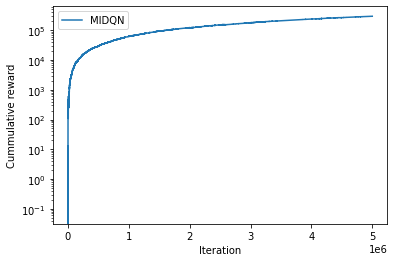

In [261]:
plt.plot(np.cumsum(r_MIDQN_LSTM))

plt.legend(['MIDQN'])
plt.ylabel('Cummulative reward')
plt.xlabel('Iteration')
plt.yscale('log')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN - cum reward.pdf')

In [262]:
avg_r_MIDQN_LSTM = np.cumsum(r_MIDQN_LSTM)/(np.arange(len(r_MIDQN_LSTM))+1)
avg_r_MIDQN_LSTM_1M = np.cumsum(r_MIDQN_LSTM_1M)/(np.arange(len(r_MIDQN_LSTM_1M))+1)
avg_r_MIDQN_LSTM_500K = np.cumsum(r_MIDQN_LSTM_500K)/(np.arange(len(r_MIDQN_LSTM_500K))+1)

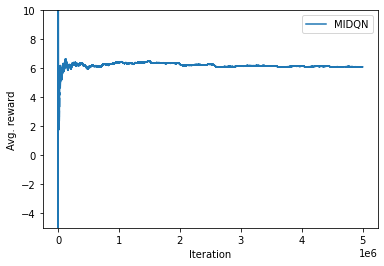

In [263]:

plt.plot(100*(np.exp(avg_r_MIDQN_LSTM)-1))

plt.ylim((-5,10))

plt.legend(['MIDQN'])
plt.ylabel('Avg. reward')
plt.xlabel('Iteration')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN -avg reward.png')

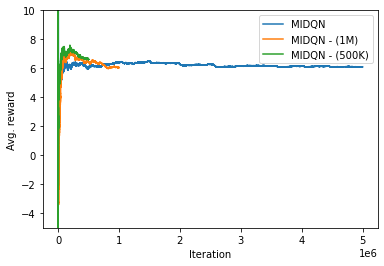

In [264]:

plt.plot(100*(np.exp(avg_r_MIDQN_LSTM)-1))
plt.plot(100*(np.exp(avg_r_MIDQN_LSTM_1M)-1))
plt.plot(100*(np.exp(avg_r_MIDQN_LSTM_500K)-1))
plt.ylim((-5,10))

plt.legend(['MIDQN','MIDQN - (1M)', 'MIDQN - (500K)'])
plt.ylabel('Avg. reward')
plt.xlabel('Iteration')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MIDQN123 -avg reward.png')

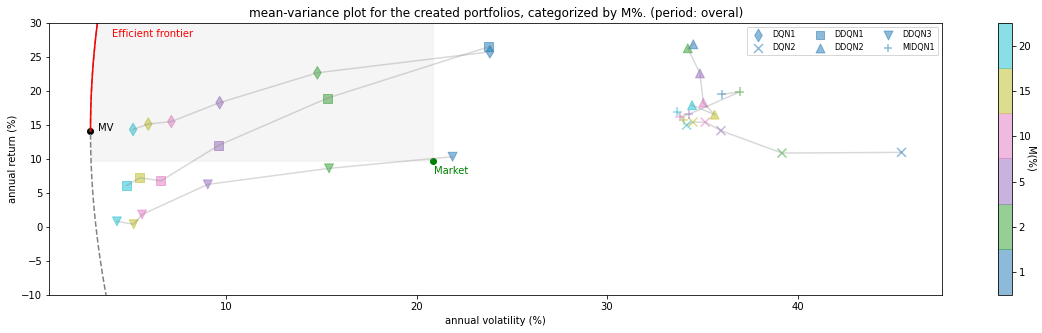

In [206]:
#MEAN VARIANCE ANALYSIS OVERAL 

tf = 252 # 1 for daily, 252 for annual


rets        = simple_returns[:,:]
market_ret  = 100*(np.exp(bh_data/348)-1)
exp_ret     = tf*np.mean(rets, axis=1)  #expected returns 
cov_ret     = np.cov(rets)              #Cov of returns
cov_inv_ret = np.linalg.inv(cov_ret)    #inv of Cov
unit        = np.ones((len(rets),1))    #unit vector


A =  np.matmul(np.matmul(unit.T, cov_inv_ret),unit)
B =  np.matmul(np.matmul(unit.T, cov_inv_ret),exp_ret)
C =  np.matmul(np.matmul(exp_ret.T, cov_inv_ret),exp_ret)
D =  A*C - B**2


mu_min_var = np.matmul(exp_ret, np.matmul(cov_inv_ret,unit)/A)
var_min_var = 1/A


if tf==1: 
    mu = np.linspace(-0.15,0.40, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]
else: 
    mu_EF = np.linspace(mu_min_var,40, 100)
    var_EF = np.sqrt(tf*( A*(mu_EF)**2 - 2*B*mu_EF + C)/D)

    mu = np.linspace(-15,40, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]
    

market_mu   = tf*np.mean(market_ret)
market_var  = np.sqrt(tf*np.var(market_ret))




#create figure

col_map = 'tab10'
sizes = 80
transp= 0.5 
K = ['1', '2', '5','10', '15','20']
k = [0,1,2,3,4,5]


stocks_mu  = tf*np.mean(rets,axis=1)
stocks_var = np.sqrt(tf*np.diagonal(cov_ret))

#calculate expected variance and returns
DQN1_ret    = 100*(np.exp(QL_CNN_returns)-1)
DQN1_mu     = tf*np.mean(DQN1_ret,axis=0)
DQN1_var    = np.sqrt(tf*np.var(DQN1_ret,axis=0))
DQN1_Sr     = DQN1_mu/DQN1_var

DQN2_ret    = 100*(np.exp(QL_LSTM_returns)-1)
DQN2_mu     = tf*np.mean(DQN2_ret,axis=0)
DQN2_var    = np.sqrt(tf*np.var(DQN2_ret,axis=0))
DQN2_Sr     = DQN2_mu/DQN2_var

DDQN1_ret    = 100*(np.exp(DDQL_CNN_returns)-1)
DDQN1_mu     = tf*np.mean(DDQN1_ret,axis=0)
DDQN1_var    = np.sqrt(tf*np.var(DDQN1_ret,axis=0))
DDQN1_Sr     = DDQN1_mu/DDQN1_var

DDQN2_ret    = 100*(np.exp(DDQL_LSTM_returns)-1)
DDQN2_mu     = tf*np.mean(DDQN2_ret,axis=0)
DDQN2_var    = np.sqrt(tf*np.var(DDQN2_ret,axis=0))
DDQN2_Sr     = DDQN2_mu/DDQN2_var

DDQN3_ret    = 100*(np.exp(DDQL_CNN_LSTM_returns)-1)
DDQN3_mu     = tf*np.mean(DDQN3_ret,axis=0)
DDQN3_var    = np.sqrt(tf*np.var(DDQN3_ret,axis=0))
DDQN3_Sr     = DDQN3_mu/DDQN3_var

MIDQN1_ret    = 100*(np.exp(MIDQL_CNN_returns)-1)
MIDQN1_mu     = tf*np.mean(MIDQN1_ret,axis=0)
MIDQN1_var    = np.sqrt(tf*np.var(MIDQN1_ret,axis=0))
MIDQN1_Sr     = MIDQN1_mu/MIDQN1_var



# CREATE FIGURE
plt.figure(figsize=(20,5))


#plot the models
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp, marker='d')
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='x')

DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='s')
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='^')
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='v')

MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='+')

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: K[val])


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

# We must be sure to specify the ticks matching our target names

plt.colorbar(ticks=[0,1,2,3,4,5], format=formatter).set_label(label='M(%)', rotation=270)
plt.clim(-0.5, 5.5)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')


#plot market portfolio
plt.scatter(market_var,market_mu, c='green')
plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')


plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.fill_betweenx(y=np.linspace(market_mu,40,len(var[40:])),x1=market_var,x2=var[40:], alpha=0.08, color='grey')

plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

if tf==252: 
    plt.ylim((-10,30))
    plt.text(4,28, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by M%. (period: overal)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_levels_of_M.pdf',  bbox_inches='tight', pad_inches=0)

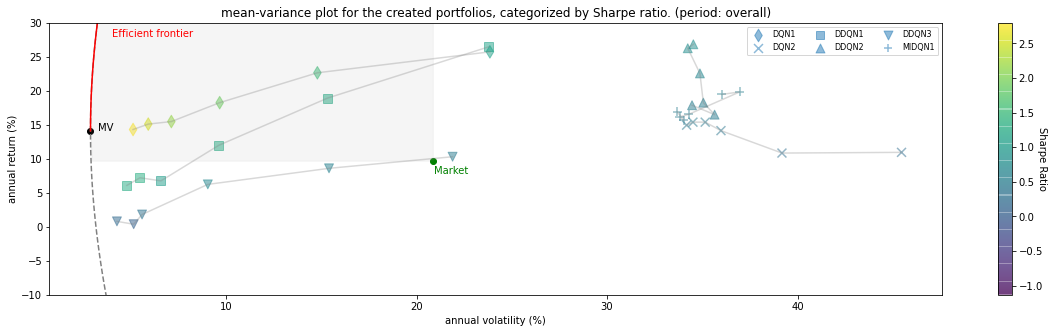

In [207]:
# CREATE FIGURE

col_map='viridis'

plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=DQN1_Sr, cmap=col_map, s=sizes, alpha=transp, marker='d')
plt.clim(min_, max_)
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=DQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='x')
plt.clim(min_, max_)
DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=DDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='s')
plt.clim(min_, max_)
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=DDQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='^')
plt.clim(min_, max_)
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=DDQN3_Sr, cmap=col_map, s=sizes, alpha=transp,marker='v')
plt.clim(min_, max_)
MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=MIDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='+')
plt.clim(min_, max_)

plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)


plt.fill_betweenx(y=np.linspace(market_mu,40,len(var[40:])),x1=market_var,x2=var[40:], alpha=0.08, color='grey')

if tf==252: 
    plt.ylim((-10,30))
    plt.text(4,28, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by Sharpe ratio. (period: overall)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe.pdf',  bbox_inches='tight', pad_inches=0)

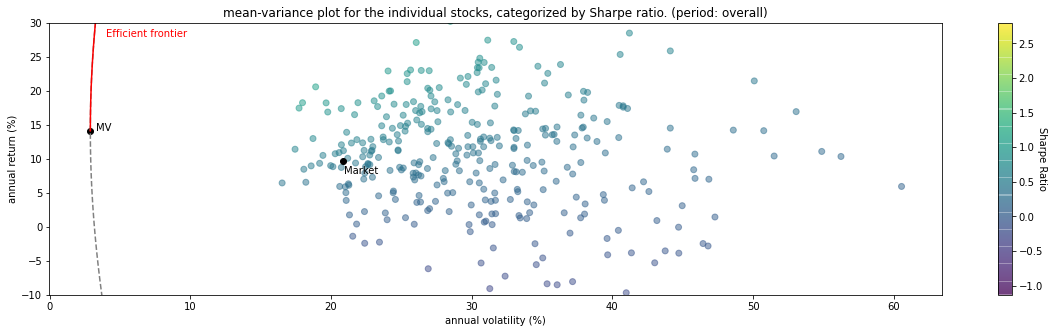

In [208]:
# CREATE FIGURE
plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

plt.scatter(stocks_var, stocks_mu, c=stocks_mu/stocks_var, alpha=0.5, cmap=col_map)
plt.clim(min_, max_)


plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='black')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

if tf==252: 
    plt.ylim((-10,30))
    plt.text(4,28, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')

plt.title('mean-variance plot for the individual stocks, categorized by Sharpe ratio. (period: overall)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_stocks.pdf' ,  bbox_inches='tight', pad_inches=0)

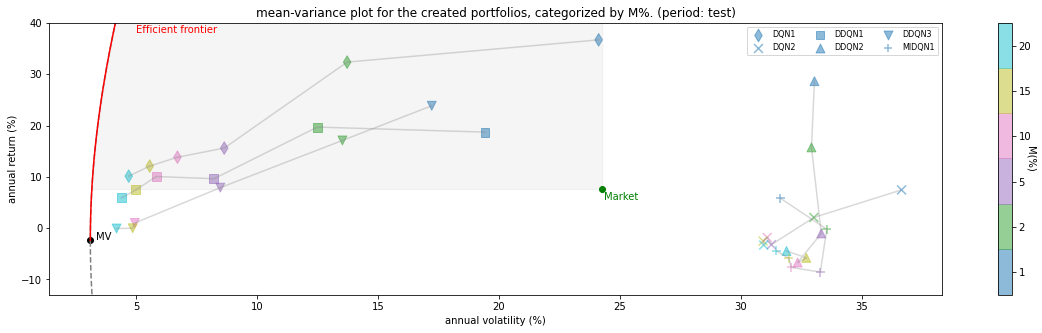

In [209]:
#MEAN VARIANCE ANALYSIS  - test period


tf = 252 # 1 for daily, 252 for annual


rets        = simple_returns[:,4434:]
market_ret  = 100*(np.exp(bh_data[4434:]/348)-1)
exp_ret     = tf*np.mean(rets, axis=1)  #expected returns 
cov_ret     = np.cov(rets)              #Cov of returns
cov_inv_ret = np.linalg.inv(cov_ret)    #inv of Cov
unit        = np.ones((len(rets),1))    #unit vector


A =  np.matmul(np.matmul(unit.T, cov_inv_ret),unit)
B =  np.matmul(np.matmul(unit.T, cov_inv_ret),exp_ret)
C =  np.matmul(np.matmul(exp_ret.T, cov_inv_ret),exp_ret)
D =  A*C - B**2

mu_min_var = np.matmul(exp_ret, np.matmul(cov_inv_ret,unit)/A)
var_min_var = 1/A

if tf==1: 
    mu = np.linspace(-0.15,0.40, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]
else: 
    mu_EF = np.linspace(mu_min_var,50, 100)
    var_EF = np.sqrt(tf*( A*(mu_EF)**2 - 2*B*mu_EF + C)/D)

    mu = np.linspace(-55,50, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]

market_mu =tf*np.mean(market_ret)
market_var = np.sqrt(tf*np.var(market_ret))





#create figure


col_map = 'tab10'
sizes = 80
transp= 0.5 
K = ['1', '2', '5','10', '15','20']
k = [0,1,2,3,4,5]


stocks_mu  = tf*np.mean(rets,axis=1)
stocks_var = np.sqrt(tf*np.diagonal(cov_ret))

#calculate expected variance and returns
DQN1_ret    = 100*(np.exp(QL_CNN_returns[4434:,:])-1)
DQN1_mu     = tf*np.mean(DQN1_ret,axis=0)
DQN1_var    = np.sqrt(tf*np.var(DQN1_ret,axis=0))
DQN1_Sr     = DQN1_mu/DQN1_var

DQN2_ret    = 100*(np.exp(QL_LSTM_returns[4434:,:])-1)
DQN2_mu     = tf*np.mean(DQN2_ret,axis=0)
DQN2_var    = np.sqrt(tf*np.var(DQN2_ret,axis=0))
DQN2_Sr     = DQN2_mu/DQN2_var

DDQN1_ret    = 100*(np.exp(DDQL_CNN_returns[4434:,:])-1)
DDQN1_mu     = tf*np.mean(DDQN1_ret,axis=0)
DDQN1_var    = np.sqrt(tf*np.var(DDQN1_ret,axis=0))
DDQN1_Sr     = DDQN1_mu/DDQN1_var

DDQN2_ret    = 100*(np.exp(DDQL_LSTM_returns[4434:,:])-1)
DDQN2_mu     = tf*np.mean(DDQN2_ret,axis=0)
DDQN2_var    = np.sqrt(tf*np.var(DDQN2_ret,axis=0))
DDQN2_Sr     = DDQN2_mu/DDQN2_var

DDQN3_ret    = 100*(np.exp(DDQL_CNN_LSTM_returns[4434:,:])-1)
DDQN3_mu     = tf*np.mean(DDQN3_ret,axis=0)
DDQN3_var    = np.sqrt(tf*np.var(DDQN3_ret,axis=0))
DDQN3_Sr     = DDQN3_mu/DDQN3_var

MIDQN1_ret    = 100*(np.exp(MIDQL_CNN_returns[4434:,:])-1)
MIDQN1_mu     = tf*np.mean(MIDQN1_ret,axis=0)
MIDQN1_var    = np.sqrt(tf*np.var(MIDQN1_ret,axis=0))
MIDQN1_Sr     = MIDQN1_mu/MIDQN1_var



# CREATE FIGURE
plt.figure(figsize=(20,5))


#plot the models
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp, marker='d')
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='x')

DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='s')
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='^')
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='v')

MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='+')

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: K[val])


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

# We must be sure to specify the ticks matching our target names

plt.colorbar(ticks=[0,1,2,3,4,5], format=formatter).set_label(label='M(%)', rotation=270)
plt.clim(-0.5, 5.5)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var, mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var+1,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')



plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')


plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')

if tf==252: 
    plt.ylim((-13,40))
    plt.text(5,38, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by M%. (period: test)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_levels_of_M_test.pdf',  bbox_inches='tight', pad_inches=0)

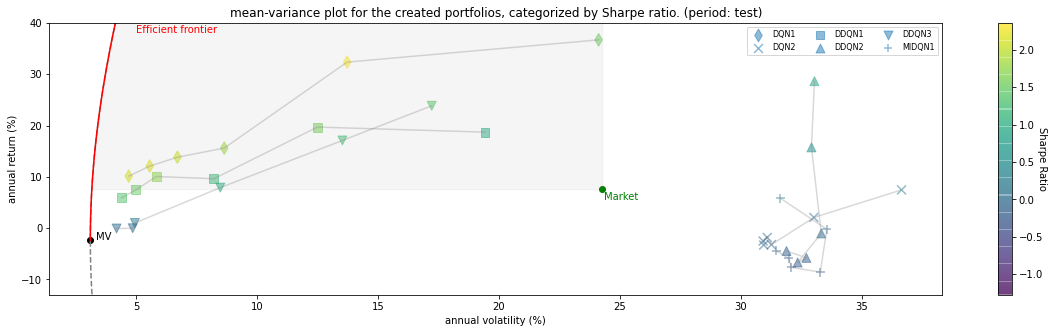

In [210]:
# CREATE FIGURE

col_map='viridis'

plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=DQN1_Sr, cmap=col_map, s=sizes, alpha=transp, marker='d')
plt.clim(min_, max_)
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=DQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='x')
plt.clim(min_, max_)
DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=DDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='s')
plt.clim(min_, max_)
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=DDQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='^')
plt.clim(min_, max_)
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=DDQN3_Sr, cmap=col_map, s=sizes, alpha=transp,marker='v')
plt.clim(min_, max_)
MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=MIDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='+')
plt.clim(min_, max_)

plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var, mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')
if tf==252: 
    plt.ylim((-13,40))
    plt.text(5,38, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by Sharpe ratio. (period: test)')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_test.pdf',  bbox_inches='tight', pad_inches=0)

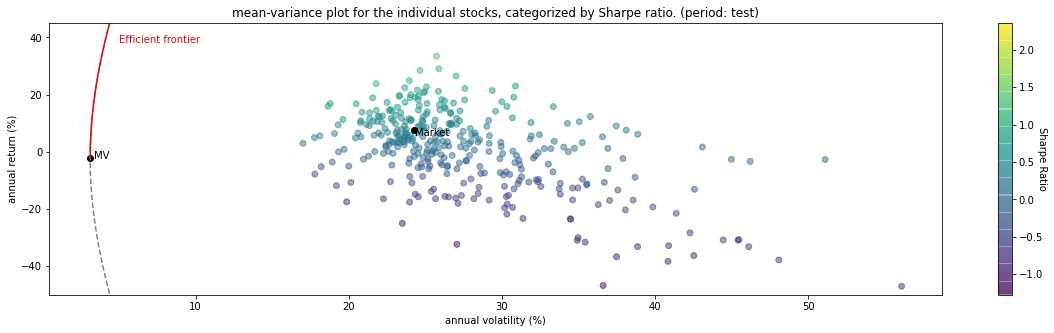

In [211]:
# CREATE FIGURE
plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

plt.scatter(stocks_var, stocks_mu, c=stocks_mu/stocks_var, alpha=0.5, cmap=col_map)
plt.clim(min_, max_)


plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var, mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='black')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

if tf==252: 
    plt.ylim((-50,45))
    plt.text(5,38, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')

plt.title('mean-variance plot for the individual stocks, categorized by Sharpe ratio. (period: test)')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_stocks_test.pdf' ,  bbox_inches='tight', pad_inches=0)

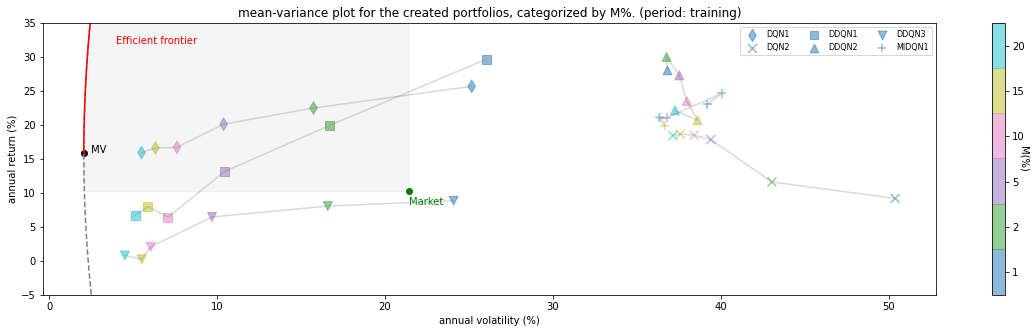

In [212]:
#MEAN VARIANCE ANALYSIS  - training period

tf = 252 # 1 for daily, 252 for annual


rets        = simple_returns[:,:3651]
market_ret  = 100*(np.exp(bh_data[:3651]/348)-1)
exp_ret     = tf*np.mean(rets, axis=1)  #expected returns 
cov_ret     = np.cov(rets)              #Cov of returns
cov_inv_ret = np.linalg.inv(cov_ret)    #inv of Cov
unit        = np.ones((len(rets),1))    #unit vector


A =  np.matmul(np.matmul(unit.T, cov_inv_ret),unit)
B =  np.matmul(np.matmul(unit.T, cov_inv_ret),exp_ret)
C =  np.matmul(np.matmul(exp_ret.T, cov_inv_ret),exp_ret)
D =  A*C - B**2

mu_min_var = np.matmul(exp_ret, np.matmul(cov_inv_ret,unit)/A)
var_min_var = 1/A


if tf==1: 
    mu = np.linspace(-0.15,0.40, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]-0.38
else: 
    mu_EF = np.linspace(mu_min_var,50, 100)
    var_EF = np.sqrt(tf*( A*(mu_EF)**2 - 2*B*mu_EF + C)/D) - 6

    mu = np.linspace(-60,50, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:] - 6

market_mu =tf*np.mean(market_ret)
market_var = np.sqrt(tf*np.var(market_ret))





#create figure


col_map = 'tab10'
sizes = 80
transp= 0.5 
K = ['1', '2', '5','10', '15','20']
k = [0,1,2,3,4,5]


stocks_mu  = tf*np.mean(rets,axis=1)
stocks_var = np.sqrt(tf*np.diagonal(cov_ret))

#calculate expected variance and returns
DQN1_ret    = 100*(np.exp(QL_CNN_returns[:3651,:])-1)
DQN1_mu     = tf*np.mean(DQN1_ret,axis=0)
DQN1_var    = np.sqrt(tf*np.var(DQN1_ret,axis=0))
DQN1_Sr     = DQN1_mu/DQN1_var

DQN2_ret    = 100*(np.exp(QL_LSTM_returns[:3651,:])-1)
DQN2_mu     = tf*np.mean(DQN2_ret,axis=0)
DQN2_var    = np.sqrt(tf*np.var(DQN2_ret,axis=0))
DQN2_Sr     = DQN2_mu/DQN2_var

DDQN1_ret    = 100*(np.exp(DDQL_CNN_returns[:3651,:])-1)
DDQN1_mu     = tf*np.mean(DDQN1_ret,axis=0)
DDQN1_var    = np.sqrt(tf*np.var(DDQN1_ret,axis=0))
DDQN1_Sr     = DDQN1_mu/DDQN1_var

DDQN2_ret    = 100*(np.exp(DDQL_LSTM_returns[:3651,:])-1)
DDQN2_mu     = tf*np.mean(DDQN2_ret,axis=0)
DDQN2_var    = np.sqrt(tf*np.var(DDQN2_ret,axis=0))
DDQN2_Sr     = DDQN2_mu/DDQN2_var

DDQN3_ret    = 100*(np.exp(DDQL_CNN_LSTM_returns[:3651,:])-1)
DDQN3_mu     = tf*np.mean(DDQN3_ret,axis=0)
DDQN3_var    = np.sqrt(tf*np.var(DDQN3_ret,axis=0))
DDQN3_Sr     = DDQN3_mu/DDQN3_var

MIDQN1_ret    = 100*(np.exp(MIDQL_CNN_returns[:3651,:])-1)
MIDQN1_mu     = tf*np.mean(MIDQN1_ret,axis=0)
MIDQN1_var    = np.sqrt(tf*np.var(MIDQN1_ret,axis=0))
MIDQN1_Sr     = MIDQN1_mu/MIDQN1_var



# CREATE FIGURE
plt.figure(figsize=(20,5))


#plot the models
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp, marker='d')
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='x')

DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='s')
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='^')
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='v')

MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='+')



plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: K[val])

# We must be sure to specify the ticks matching our target names

plt.colorbar(ticks=[0,1,2,3,4,5], format=formatter).set_label(label='M(%)', rotation=270)
plt.clim(-0.5, 5.5)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var-2.05,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var-1.6,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')



plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')


plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')


if tf==252: 
    plt.ylim((-5,35))
    plt.text(4,32, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by M%. (period: training)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_levels_of_M_train.pdf',  bbox_inches='tight', pad_inches=0)

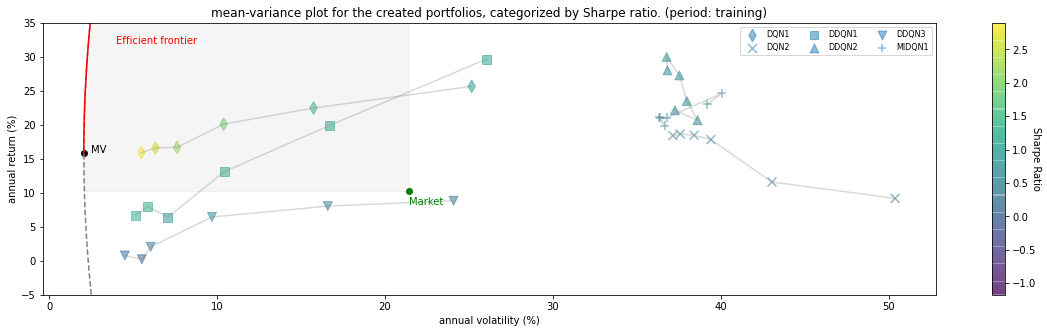

In [213]:
# CREATE FIGURE

col_map='viridis'

plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

#plt.scatter(stocks_var, stocks_mu, c=stocks_mu/stocks_var, alpha=0.1, cmap=col_map)
#plt.clim(min_, max_)
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=DQN1_Sr, cmap=col_map, s=sizes, alpha=transp, marker='d')
plt.clim(min_, max_)
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=DQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='x')
plt.clim(min_, max_)
DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=DDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='s')
plt.clim(min_, max_)
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=DDQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='^')
plt.clim(min_, max_)
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=DDQN3_Sr, cmap=col_map, s=sizes, alpha=transp,marker='v')
plt.clim(min_, max_)
MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=MIDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='+')
plt.clim(min_, max_)

plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)


plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')

if tf==252: 
    plt.ylim((-5,35))
    plt.text(4,32, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')


plt.title('mean-variance plot for the created portfolios, categorized by Sharpe ratio. (period: training)')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_train.pdf',  bbox_inches='tight', pad_inches=0)

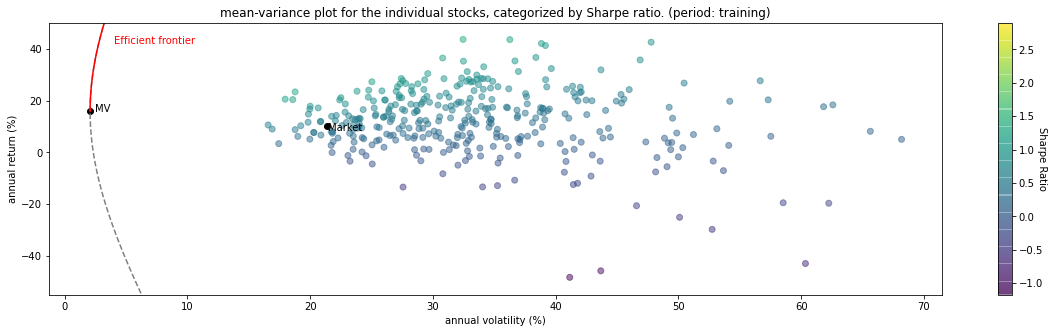

In [214]:
# CREATE FIGURE
plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

plt.scatter(stocks_var, stocks_mu, c=stocks_mu/stocks_var, alpha=0.5, cmap=col_map)
plt.clim(min_, max_)
plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='black')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

if tf==252: 
    plt.ylim((-55,50))
    plt.text(4,42, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')

plt.title('mean-variance plot for the individual stocks, categorized by Sharpe ratio. (period: training)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_stocks_train.pdf' ,  bbox_inches='tight', pad_inches=0)

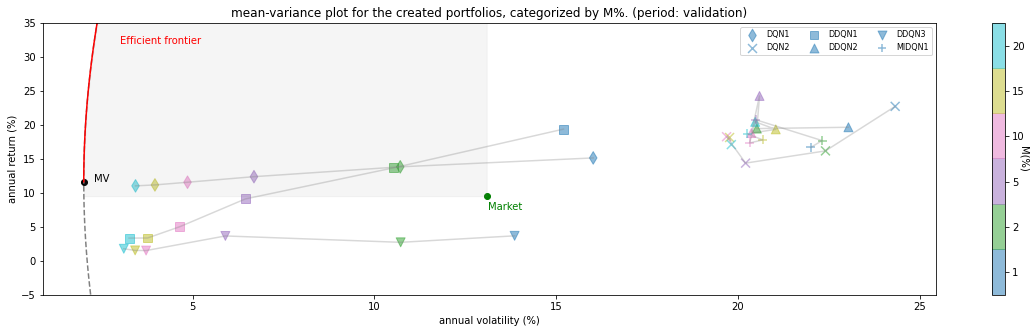

In [215]:
#MEAN VARIANCE ANALYSIS  - validation period

tf = 252 # 1 for daily, 252 for annual


rets        = simple_returns[:,3651:4434]
market_ret  = 100*(np.exp(bh_data[3651:4434]/348)-1)
exp_ret     = tf*np.mean(rets, axis=1)  #expected returns 
cov_ret     = np.cov(rets)              #Cov of returns
cov_inv_ret = np.linalg.inv(cov_ret)    #inv of Cov
unit        = np.ones((len(rets),1))    #unit vector


A =  np.matmul(np.matmul(unit.T, cov_inv_ret),unit)
B =  np.matmul(np.matmul(unit.T, cov_inv_ret),exp_ret)
C =  np.matmul(np.matmul(exp_ret.T, cov_inv_ret),exp_ret)
D =  A*C - B**2

mu_min_var = np.matmul(exp_ret, np.matmul(cov_inv_ret,unit)/A)
var_min_var = 1/A


if tf==1: 
    mu = np.linspace(-0.15,0.40, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]
else: 
    mu_EF = np.linspace(mu_min_var,50, 100)
    var_EF = np.sqrt(tf*( A*(mu_EF)**2 - 2*B*mu_EF + C)/D)

    mu = np.linspace(-50,50, 100)
    var = np.sqrt(tf*( A*(mu)**2 - 2*B*mu + C)/D)[0,:]

market_mu =tf*np.mean(market_ret)
market_var = np.sqrt(tf*np.var(market_ret))





#create figure


col_map = 'tab10'
sizes = 80
transp= 0.5 
K = ['1', '2', '5','10', '15','20']
k = [0,1,2,3,4,5]


stocks_mu  = tf*np.mean(rets,axis=1)
stocks_var = np.sqrt(tf*np.diagonal(cov_ret))

#calculate expected variance and returns
DQN1_ret    = 100*(np.exp(QL_CNN_returns[3651:4434,:])-1)
DQN1_mu     = tf*np.mean(DQN1_ret,axis=0)
DQN1_var    = np.sqrt(tf*np.var(DQN1_ret,axis=0))
DQN1_Sr     = DQN1_mu/DQN1_var

DQN2_ret    = 100*(np.exp(QL_LSTM_returns[3651:4434,:])-1)
DQN2_mu     = tf*np.mean(DQN2_ret,axis=0)
DQN2_var    = np.sqrt(tf*np.var(DQN2_ret,axis=0))
DQN2_Sr     = DQN2_mu/DQN2_var

DDQN1_ret    = 100*(np.exp(DDQL_CNN_returns[3651:4434,:])-1)
DDQN1_mu     = tf*np.mean(DDQN1_ret,axis=0)
DDQN1_var    = np.sqrt(tf*np.var(DDQN1_ret,axis=0))
DDQN1_Sr     = DDQN1_mu/DDQN1_var

DDQN2_ret    = 100*(np.exp(DDQL_LSTM_returns[3651:4434,:])-1)
DDQN2_mu     = tf*np.mean(DDQN2_ret,axis=0)
DDQN2_var    = np.sqrt(tf*np.var(DDQN2_ret,axis=0))
DDQN2_Sr     = DDQN2_mu/DDQN2_var

DDQN3_ret    = 100*(np.exp(DDQL_CNN_LSTM_returns[3651:4434,:])-1)
DDQN3_mu     = tf*np.mean(DDQN3_ret,axis=0)
DDQN3_var    = np.sqrt(tf*np.var(DDQN3_ret,axis=0))
DDQN3_Sr     = DDQN3_mu/DDQN3_var

MIDQN1_ret    = 100*(np.exp(MIDQL_CNN_returns[3651:4434,:])-1)
MIDQN1_mu     = tf*np.mean(MIDQN1_ret,axis=0)
MIDQN1_var    = np.sqrt(tf*np.var(MIDQN1_ret,axis=0))
MIDQN1_Sr     = MIDQN1_mu/MIDQN1_var



# CREATE FIGURE
plt.figure(figsize=(20,5))


#plot the models
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp, marker='d')
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='x')

DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='s')
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='^')
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='v')

MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=k, cmap=plt.cm.get_cmap(col_map, 6), s=sizes, alpha=transp,marker='+')



plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: K[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0,1,2,3,4,5], format=formatter).set_label(label='M(%)', rotation=270)
plt.clim(-0.5, 5.5)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var+0.72,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var+1,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')



plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')


plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')


if tf==252: 
    plt.ylim((-5,35))
    plt.text(3,32, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by M%. (period: validation)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_levels_of_M_val.pdf',  bbox_inches='tight', pad_inches=0)

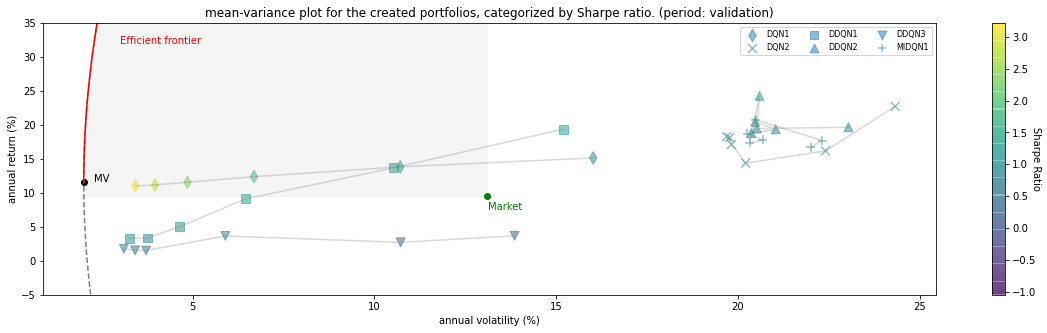

In [216]:
# CREATE FIGURE

col_map='viridis'

plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models
DQN1_plt = plt.scatter(DQN1_var,DQN1_mu,c=DQN1_Sr, cmap=col_map, s=sizes, alpha=transp, marker='d')
plt.clim(min_, max_)
DQN2_plt = plt.scatter(DQN2_var,DQN2_mu,c=DQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='x')
plt.clim(min_, max_)
DDQN1_plt = plt.scatter(DDQN1_var,DDQN1_mu,c=DDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='s')
plt.clim(min_, max_)
DDQN2_plt = plt.scatter(DDQN2_var,DDQN2_mu,c=DDQN2_Sr, cmap=col_map, s=sizes, alpha=transp,marker='^')
plt.clim(min_, max_)
DDQN3_plt = plt.scatter(DDQN3_var,DDQN3_mu,c=DDQN3_Sr, cmap=col_map, s=sizes, alpha=transp,marker='v')
plt.clim(min_, max_)
MIDQN1_plt = plt.scatter(MIDQN1_var,MIDQN1_mu,c=MIDQN1_Sr, cmap=col_map, s=sizes, alpha=transp,marker='+')
plt.clim(min_, max_)

plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)


plt.plot(DQN1_var,DQN1_mu       ,color='grey', alpha=0.3)
plt.plot(DQN2_var,DQN2_mu       ,color='grey', alpha=0.3)
plt.plot(DDQN1_var,DDQN1_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN2_var,DDQN2_mu     ,color='grey', alpha=0.3)
plt.plot(DDQN3_var,DDQN3_mu     ,color='grey', alpha=0.3)
plt.plot(MIDQN1_var,MIDQN1_mu   ,color='grey', alpha=0.3)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='green')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

plt.legend((DQN1_plt, DQN2_plt, DDQN1_plt,DDQN2_plt,DDQN3_plt,MIDQN1_plt),
           ('DQN1','DQN2','DDQN1','DDQN2','DDQN3','MIDQN1'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)


plt.fill_betweenx(y=np.linspace(market_mu,50,len(var[60:])),x1=market_var,x2=var[60:], alpha=0.08, color='grey')

if tf==252: 
    plt.ylim((-5,35))
    plt.text(3,32, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='green')

plt.title('mean-variance plot for the created portfolios, categorized by Sharpe ratio. (period: validation)')

plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_val.pdf',  bbox_inches='tight', pad_inches=0)

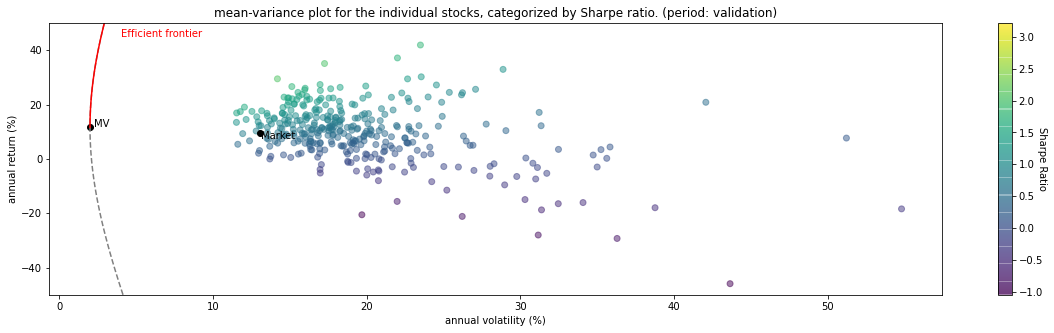

In [217]:
# CREATE FIGURE
plt.figure(figsize=(20,5))

zs = np.concatenate([DQN1_Sr, DQN2_Sr, DDQN1_Sr,DDQN2_Sr,DDQN3_Sr, MIDQN1_Sr ,stocks_mu/stocks_var], axis=0)
min_, max_ = zs.min(), zs.max()


#plot the models

plt.scatter(stocks_var, stocks_mu, c=stocks_mu/stocks_var, alpha=0.5, cmap=col_map)
plt.clim(min_, max_)
plt.colorbar().set_label(label='Sharpe Ratio', rotation=270)

#plot efficient frontier
plt.plot(var,mu, color='grey', linestyle='--')
plt.plot(var_EF,mu_EF, color='red', linestyle='-')

#plot minimal variance portfolio
plt.scatter(np.sqrt(252)*var_min_var+0.72,mu_min_var,color='black')
plt.text(np.sqrt(252)*var_min_var+1,mu_min_var,'MV' ,  color='black')

#plot market portfolio
plt.scatter(market_var,market_mu, c='black')


plt.ylabel('annual return (%)')
plt.xlabel('annual volatility (%)')

if tf==252: 
    plt.ylim((-50,50))
    plt.text(4,45, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')
else:
    plt.ylim((-0.1,0.25))
    plt.text(.4,0.23, 'Efficient frontier', color='red')
    plt.text(market_var,market_mu, 'Market', color='black')

plt.title('mean-variance plot for the individual stocks, categorized by Sharpe ratio. (period: validation)')
plt.savefig(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Afbeeldingen scriptie\Results\MV_sharpe_stocks_val.pdf' ,  bbox_inches='tight', pad_inches=0)